In [4]:
import pytesseract
import numpy
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from pytesseract import Output

In [ ]:
img1 = cv2.imread('teste01.jpg')
plt.imshow(img1)
plt.axis('off')
plt.show()


In [ ]:
'''Fazer conversão da imagem 1 pra RGB'''

rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show()

In [ ]:
caminho = r"C:\Program Files\Tesseract-OCR"
pytesseract.pytesseract.tesseract_cmd = caminho + r"\tesseract.exe"

texto = pytesseract.image_to_string(rgb)
print(texto)

In [ ]:
img2 = cv2.imread('teste02.jpg')
plt.imshow (cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
caminho = r"C:\Program Files\Tesseract-OCR"
pytesseract.pytesseract.tesseract_cmd = caminho + r"\tesseract.exe"

texto = pytesseract.image_to_string(img2, lang='por')
print(texto)

In [ ]:
img3 = cv2.imread('trecho-livro.jpg')
plt.imshow (cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
caminho = r"C:\Program Files\Tesseract-OCR"
pytesseract.pytesseract.tesseract_cmd = caminho + r"\tesseract.exe"

config_tesseract = '--psm 6'

texto = pytesseract.image_to_string(img3, lang='por', config=config_tesseract)
print(texto)

In [ ]:
img4 = cv2.imread('saida.jpg')
plt.imshow (cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
caminho = r"C:\Program Files\Tesseract-OCR"
pytesseract.pytesseract.tesseract_cmd = caminho + r"\tesseract.exe"

config_tesseract = '--psm 6'

texto = pytesseract.image_to_string(img4, lang='por', config=config_tesseract)
print(texto)

In [ ]:
img5 = Image.open('livro01.jpg')
plt.imshow(img5);
plt.axis('off')
plt.show()

In [ ]:
print(pytesseract.image_to_osd(img5))

In [ ]:
'''Seleção dos textos'''

img6 = cv2.imread('teste_manuscrito_01.jpg')
plt.imshow(img6);
plt.axis('off')
plt.show()

In [ ]:
config_tesseract =''
resultado = pytesseract.image_to_data(img6, config=config_tesseract, lang='por', output_type=Output.DICT)
print(resultado)

In [18]:
min_conf = 40 #@param {type: 'slider', min: 0 , max: 100}

In [22]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
    x = resultado['left'] [i]
    y = resultado['top'] [i]
    w = resultado['width'] [i]
    h = resultado['height'] [i]

    cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

    return x, y, img

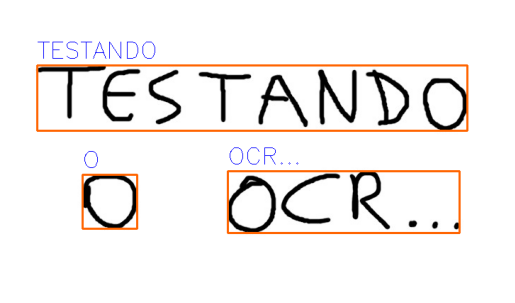

In [23]:
img_copia = img6.copy()
for i in range(0, len(resultado['text'])):
    #print(i)
    confianca = resultado['conf'] [i]
    #print(confianca)
    if confianca > min_conf:
        x, y, img = caixa_texto(resultado, img_copia)
        #print(x, y)
        texto = resultado['text'] [i]
        cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0 , 255))
plt.imshow(img_copia)
plt.axis('off')
plt.show()